<a href="https://colab.research.google.com/github/afrin110203/Handwritten-Digits-Classification-from-MNIST-Dataset-using-Deep-Learning/blob/main/code/Handwritten_Digits_Classification_from_MNIST_Dataset_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Handwritten digits classification using simple neural network**

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves.



#Step 1: Import Necessary Libraries



In [163]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from keras.models import load_model


#Step 2: Load MNIST Dataset from Keras

In [164]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


#Step 3: Examine the dataset

### Find size, shape of dataset and images

In [165]:
# find the length of train and test set

print("The length of the training set is:", len(x_train))
print("The length of the test set is:", len(x_test))

# find the size of each image in the train and test set
print('\n')
print("X_train shape is:", x_train.shape)
print("y_train shape is:", y_train.shape)
print("X_test shape is:", x_test.shape)
print("y_test shape is:", y_test.shape)

# Finding the shape of individual sample
print("\nan invidual image shape is:", x_train[0].shape)

The length of the training set is: 60000
The length of the test set is: 10000


X_train shape is: (60000, 28, 28)
y_train shape is: (60000,)
X_test shape is: (10000, 28, 28)
y_test shape is: (10000,)

an invidual image shape is: (28, 28)


### Find the number classes in the dataset

In [166]:
# Print the number of unique classes
num_classes = len(set(y_train))
print(f"Number of classes in the dataset: {num_classes}")

Number of classes in the dataset: 10


### Visualize sample images

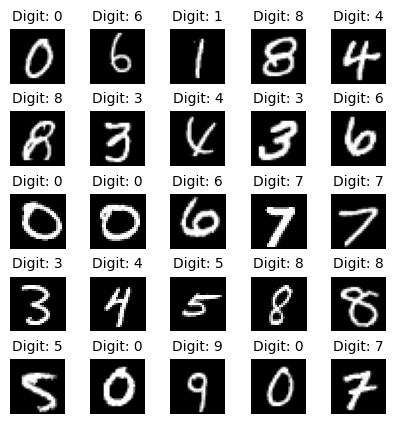

In [167]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical space between rows

for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    label = labels[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"Digit: {label}", fontsize=10)
plt.show()
plt.close('all')

# Step 4: Data Preprocessing

### Find the flattening size

In [168]:
#find the image size of an image
image_size = x_train[0].shape[0]

#find the size for flatenning
input_size = image_size * image_size
print(image_size,input_size)

28 784


### Reshape the image as flattening size

In [169]:
# Reshape the train and test data for flatenning layer as input
x_train_flattened = x_train.reshape(len(x_train), input_size)
x_test_flattened = x_test.reshape(len(x_test), input_size)

print('x_train flaten input is:',x_train_flattened.shape)
print('x_test flaten input is:',x_test_flattened.shape)

x_train flaten input is: (60000, 784)
x_test flaten input is: (10000, 784)


### Normalizing the input data between 0 to 1

In [170]:
# normalizing the data to help with the training
x_train_flattened = x_train_flattened.astype('float32') / 255
x_test_flattened = x_test_flattened.astype('float32') / 255

# print the final input shape ready for training
print("Final Train matrix shape", x_train_flattened.shape)
print("Final Test matrix shape", x_test_flattened.shape)

Final Train matrix shape (60000, 784)
Final Test matrix shape (10000, 784)


### Convert the label data to one-hot vector
For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0].

In [171]:
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)


#Step 5: Create and Train a Model

###PART 1 - Create a simple neural network in Keras
####In this step, we will create the most simple, single-layer neural network using Keras.


In [172]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(input_size,), activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Do the training
history= model.fit(x_train_flattened, y_train, epochs=5,batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 2s 3ms/step - loss: 0.6091 - accuracy: 0.8472 - val_loss: 0.3515 - val_accuracy: 0.9050
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3453 - accuracy: 0.9044 - val_loss: 0.3064 - val_accuracy: 0.9137
Epoch 3/5
750/750 [==============================] - 3s 3ms/step - loss: 0.3101 - accuracy: 0.9138 - val_loss: 0.2890 - val_accuracy: 0.9197
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.2939 - accuracy: 0.9178 - val_loss: 0.2768 - val_accuracy: 0.9242
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.2839 - accuracy: 0.9209 - val_loss: 0.2735 - val_accuracy: 0.9237


###  Plot Training loss and accuracy

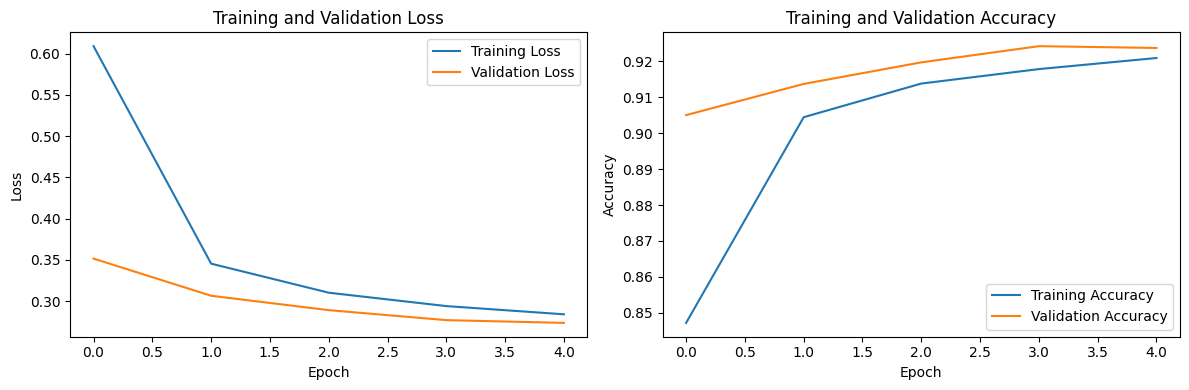

In [173]:
# Plot training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Evaluate the model

In [174]:
model.evaluate(x_test_flattened, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.2759 - accuracy: 0.9214


[0.275931179523468, 0.9214000105857849]

### Calculate predicted class vs actual class

In [175]:
# Make predictions on the test set
y_predicted_1 = model.predict(x_test_flattened)

# Get the predicted classes for each image
predicted_classes = np.argmax(y_predicted_1, axis=1)

# Get the true classes for each image
true_classes = np.argmax(y_test_one_hot, axis=1)

# Compare predicted classes with true classes
correct_predictions = np.equal(predicted_classes, true_classes)


313/313 [==============================] - 0s 1ms/step


### Visualize the predicted class vs actual class using confusion matrix

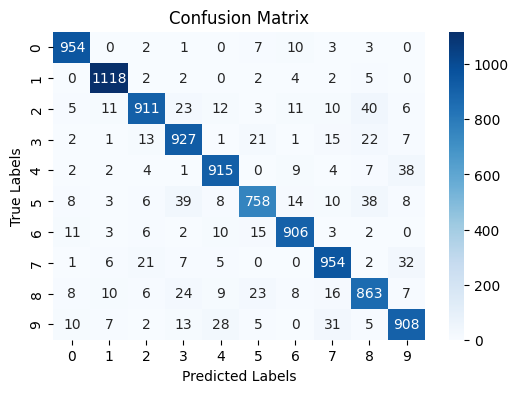

In [176]:
# Create a confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Calculate correct vs incorrect prediction

In [177]:
# Count correct and incorrect predictions
correct_predictions = np.sum(predicted_classes == true_classes)
incorrect_predictions = len(y_test) - correct_predictions

print(f"Total Correct Predictions: {correct_predictions}")
print(f"Total Incorrect Predictions: {incorrect_predictions}")

Total Correct Predictions: 9214
Total Incorrect Predictions: 786


### Calculate precision, recall, f1-score

In [178]:
class_report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(num_classes)])
print("Classification Report:\n",class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.94      0.88      0.91      1032
           3       0.89      0.92      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.85      0.88       892
           6       0.94      0.95      0.94       958
           7       0.91      0.93      0.92      1028
           8       0.87      0.89      0.88       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Visualize actual vs predicted labels for sample images

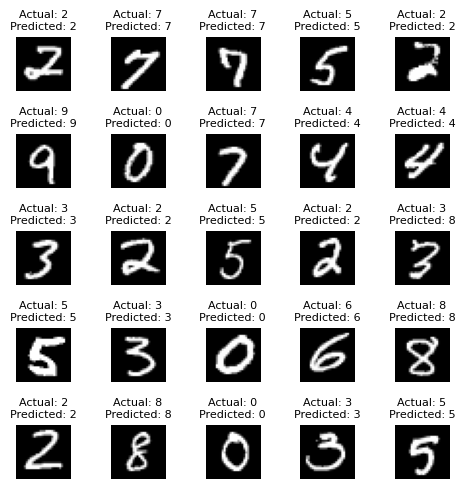

In [179]:
random_indices = np.random.choice(len(x_test), size=25, replace=False)

# Plot 25 random images along with actual and predicted labels
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical space between rows

for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    actual_label = true_classes[idx]
    predicted_label = predicted_classes[idx]
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}', fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()
plt.close('all')

# Step 7: Improve Model Performance  

###PART 2 - Adding a hidden layer to  improve performance
#### In this part, we follow the same process as the previous model to compare the improvement


In [180]:
# Create a hidden layer with 128 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(input_size,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Do the training
history= model.fit(x_train_flattened, y_train, epochs=5,batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 7s 7ms/step - loss: 0.3283 - accuracy: 0.9076 - val_loss: 0.1832 - val_accuracy: 0.9475
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.1532 - accuracy: 0.9550 - val_loss: 0.1437 - val_accuracy: 0.9589
Epoch 3/5
750/750 [==============================] - 4s 6ms/step - loss: 0.1059 - accuracy: 0.9686 - val_loss: 0.1144 - val_accuracy: 0.9663
Epoch 4/5
750/750 [==============================] - 5s 6ms/step - loss: 0.0815 - accuracy: 0.9761 - val_loss: 0.1028 - val_accuracy: 0.9692
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0640 - accuracy: 0.9813 - val_loss: 0.0898 - val_accuracy: 0.9727


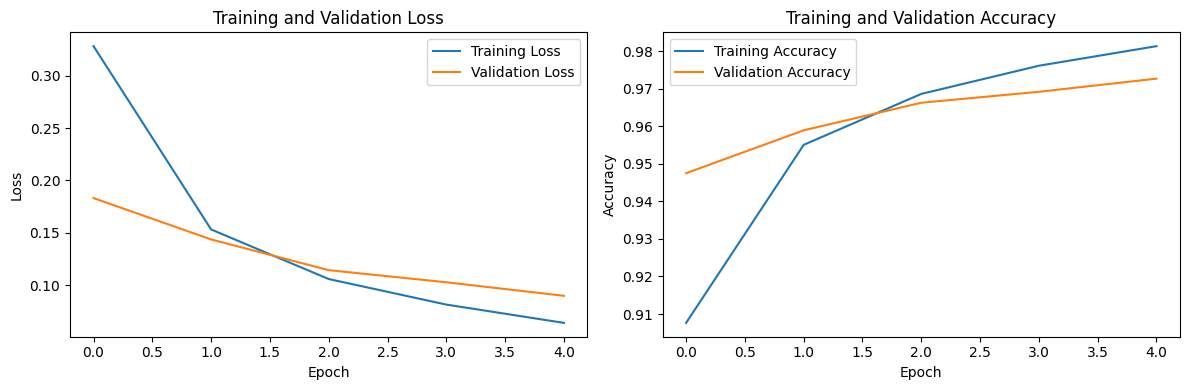

In [181]:
# Plot training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [182]:
model.evaluate(x_test_flattened, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.9752


[0.07818473875522614, 0.9751999974250793]

313/313 [==============================] - 2s 6ms/step


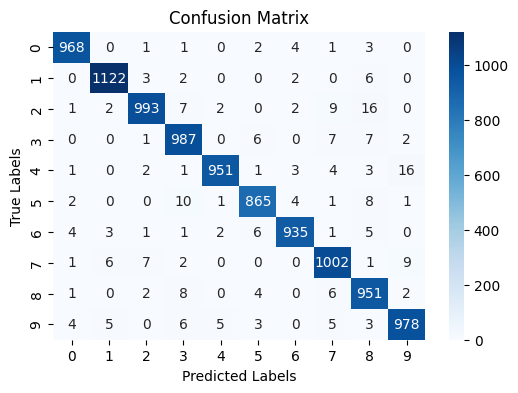

In [183]:
y_predicted_2 = model.predict(x_test_flattened)
predicted_classes = np.argmax(y_predicted_2, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)
correct_predictions = np.equal(predicted_classes, true_classes)

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [184]:
correct_predictions = np.sum(predicted_classes == true_classes)
incorrect_predictions = len(y_test) - correct_predictions

print(f"Total Correct Predictions: {correct_predictions}")
print(f"Total Incorrect Predictions: {incorrect_predictions}")


Total Correct Predictions: 9752
Total Incorrect Predictions: 248


In [185]:
class_report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(num_classes)])
print("Classification Report:\n",class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.95      0.98      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



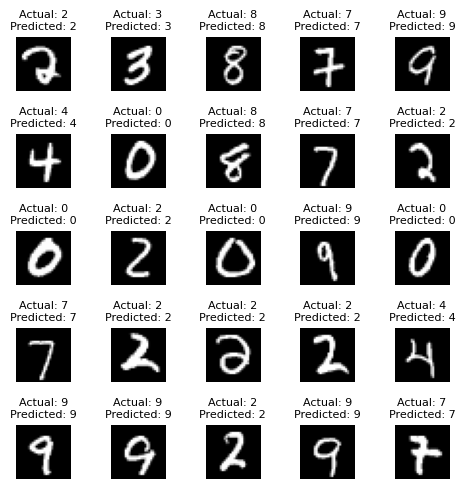

In [186]:
random_indices = np.random.choice(len(x_test), size=25, replace=False)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical space between rows

for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    actual_label = true_classes[idx]
    predicted_label = predicted_classes[idx]
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}', fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()
plt.close('all')

#Step 8: Compare the models

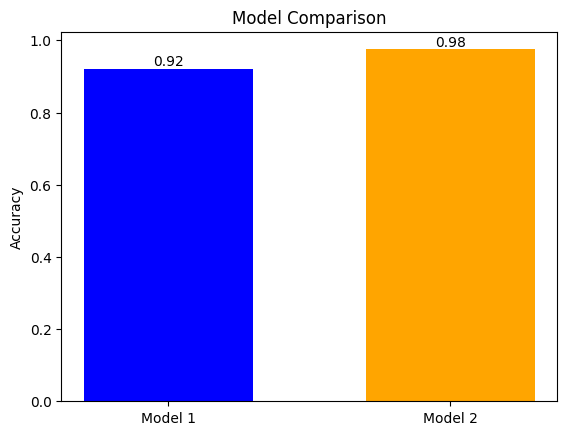

In [193]:
# Get the predicted classes for each model
predicted_classes_1 = np.argmax(y_predicted_1, axis=1)
predicted_classes_2 = np.argmax(y_predicted_2, axis=1)

# Calculate accuracy for each model
accuracy_1 = accuracy_score(np.argmax(y_test_one_hot, axis=1), predicted_classes_1)
accuracy_2 = accuracy_score(np.argmax(y_test_one_hot, axis=1), predicted_classes_2)

# Plot a bar chart for model comparison
models = ['Model 1', 'Model 2']
accuracies = [accuracy_1, accuracy_2]

fig, ax = plt.subplots()
bars = ax.bar(models, accuracies, color=['blue', 'orange'], width=0.6)
# Add values on top of the bars
for bar, value in zip(bars, accuracies):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(value, 2), ha='center', va='bottom', color='black')

plt.ylabel('Accuracy')
plt.title('Model Comparison')
#plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1
plt.show()

###Sucessfully improved model accuracy!!!!

### Additional technique for future use
Instead of flattening the data each time, we will use the keras.layers.Flatten like the example below

In [162]:
# Flattening data using keras Flatten class
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
